<a href="https://colab.research.google.com/github/Mahima-2111/Play-Store-App-Review-Analysis/blob/main/Mahima_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Attributes:*

***Demographic***:


*   Sex: male or female(Nominal)
*   
Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

*   Education: no further information provided





***Behavioral***:


*  Current Smoker: whether or not the patient is a current smoker (Nominal)

*  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)



***Information on medical history***:



*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)

*  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)


*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)

***Information on current medical condition***:



*   Tot Chol: total cholesterol level (Continuous)

*   Sys BP: systolic blood pressure (Continuous)

*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)


*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)


*   Glucose: glucose level (Continuous)

***Target variable to predict***:



*   10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)





In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/imdb new/data_cardiovascular_risk.csv'
df=pd.read_csv(file_path)

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.shape

(3390, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.describe

<bound method NDFrame.describe of         id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
0        0   64        2.0   F  ...    NaN       90.0     80.0           1
1        1   36        4.0   M  ...  29.77       72.0     75.0           0
2        2   46        1.0   F  ...  20.35       88.0     94.0           0
3        3   50        1.0   M  ...  28.26       68.0     94.0           1
4        4   64        1.0   F  ...  26.42       70.0     77.0           0
...    ...  ...        ...  ..  ...    ...        ...      ...         ...
3385  3385   60        1.0   F  ...  29.28       70.0    103.0           0
3386  3386   46        1.0   F  ...  21.96       80.0     84.0           0
3387  3387   44        3.0   M  ...  28.92       73.0     72.0           1
3388  3388   60        1.0   M  ...  23.01       80.0     85.0           0
3389  3389   54        3.0   F  ...  29.88       79.0     92.0           0

[3390 rows x 17 columns]>

In [10]:
df.dtypes

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [11]:
# Check for duplicates

duplicate_df = df[df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [13]:
# Checking for missing values

print(df.isna().sum())
null = df[df.isna().any(axis=1)]
null

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,3349,46,2.0,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,NaN,1
3370,3370,46,1.0,F,YES,30.0,0.0,0,0,0,219.0,107.0,69.0,21.40,66.0,NaN,0
3378,3378,39,3.0,F,YES,NaN,0.0,0,0,0,197.0,126.5,76.5,19.71,55.0,63.0,0
3379,3379,39,1.0,M,YES,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,NaN,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f7e4a8f10>,
      dtype=object)

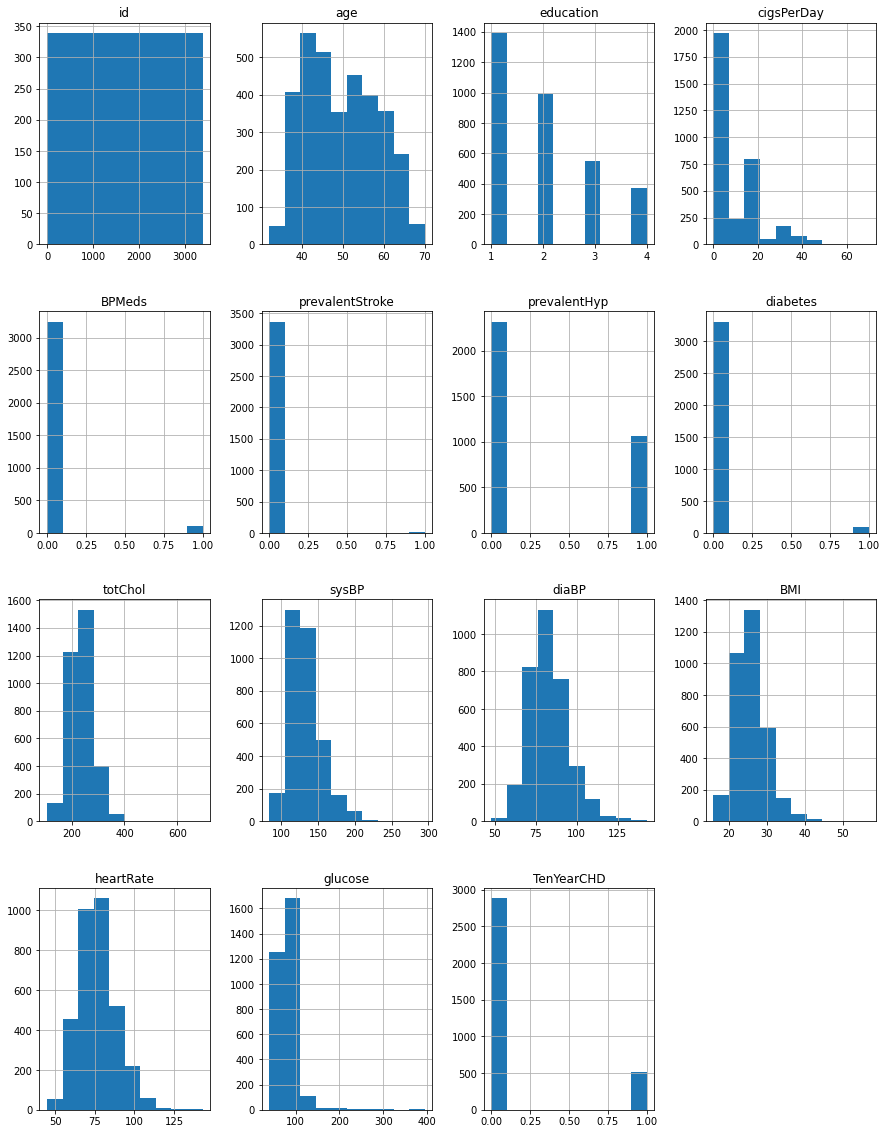

In [14]:
# Checking distributions using histogram

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

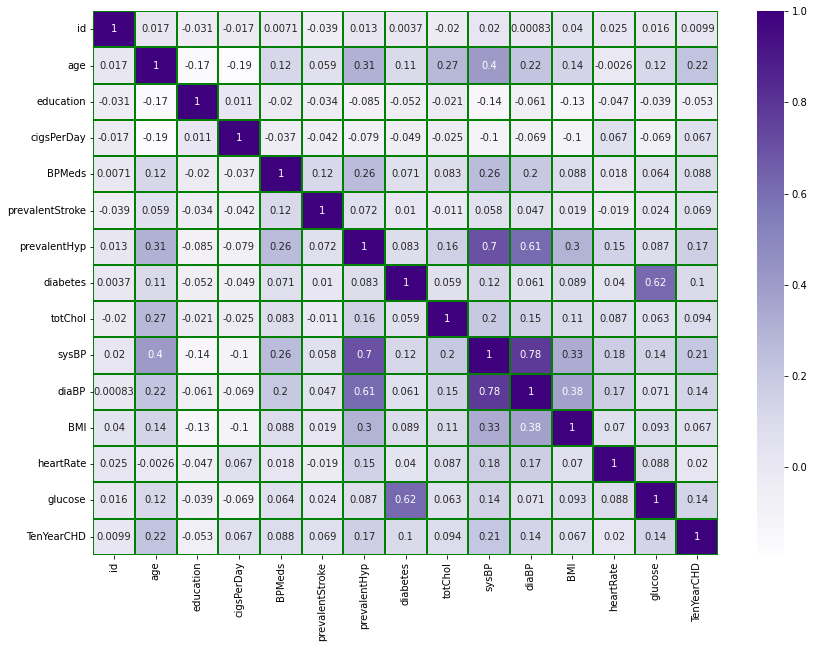

In [15]:
# checking which features are correlated with each other and are correlated with the outcome variable

plt.figure(figsize = (14, 10)) 
sns.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

**Conclusions from Heatmap**:

We are dropping the column education because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

In [ ]:
# Dropping column education and id

df.drop(['education'],axis = 1,inplace = True)
df.drop(['id'],axis = 1,inplace = True)

In [16]:
df.drop(['id'],axis = 1,inplace = True)

In [17]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


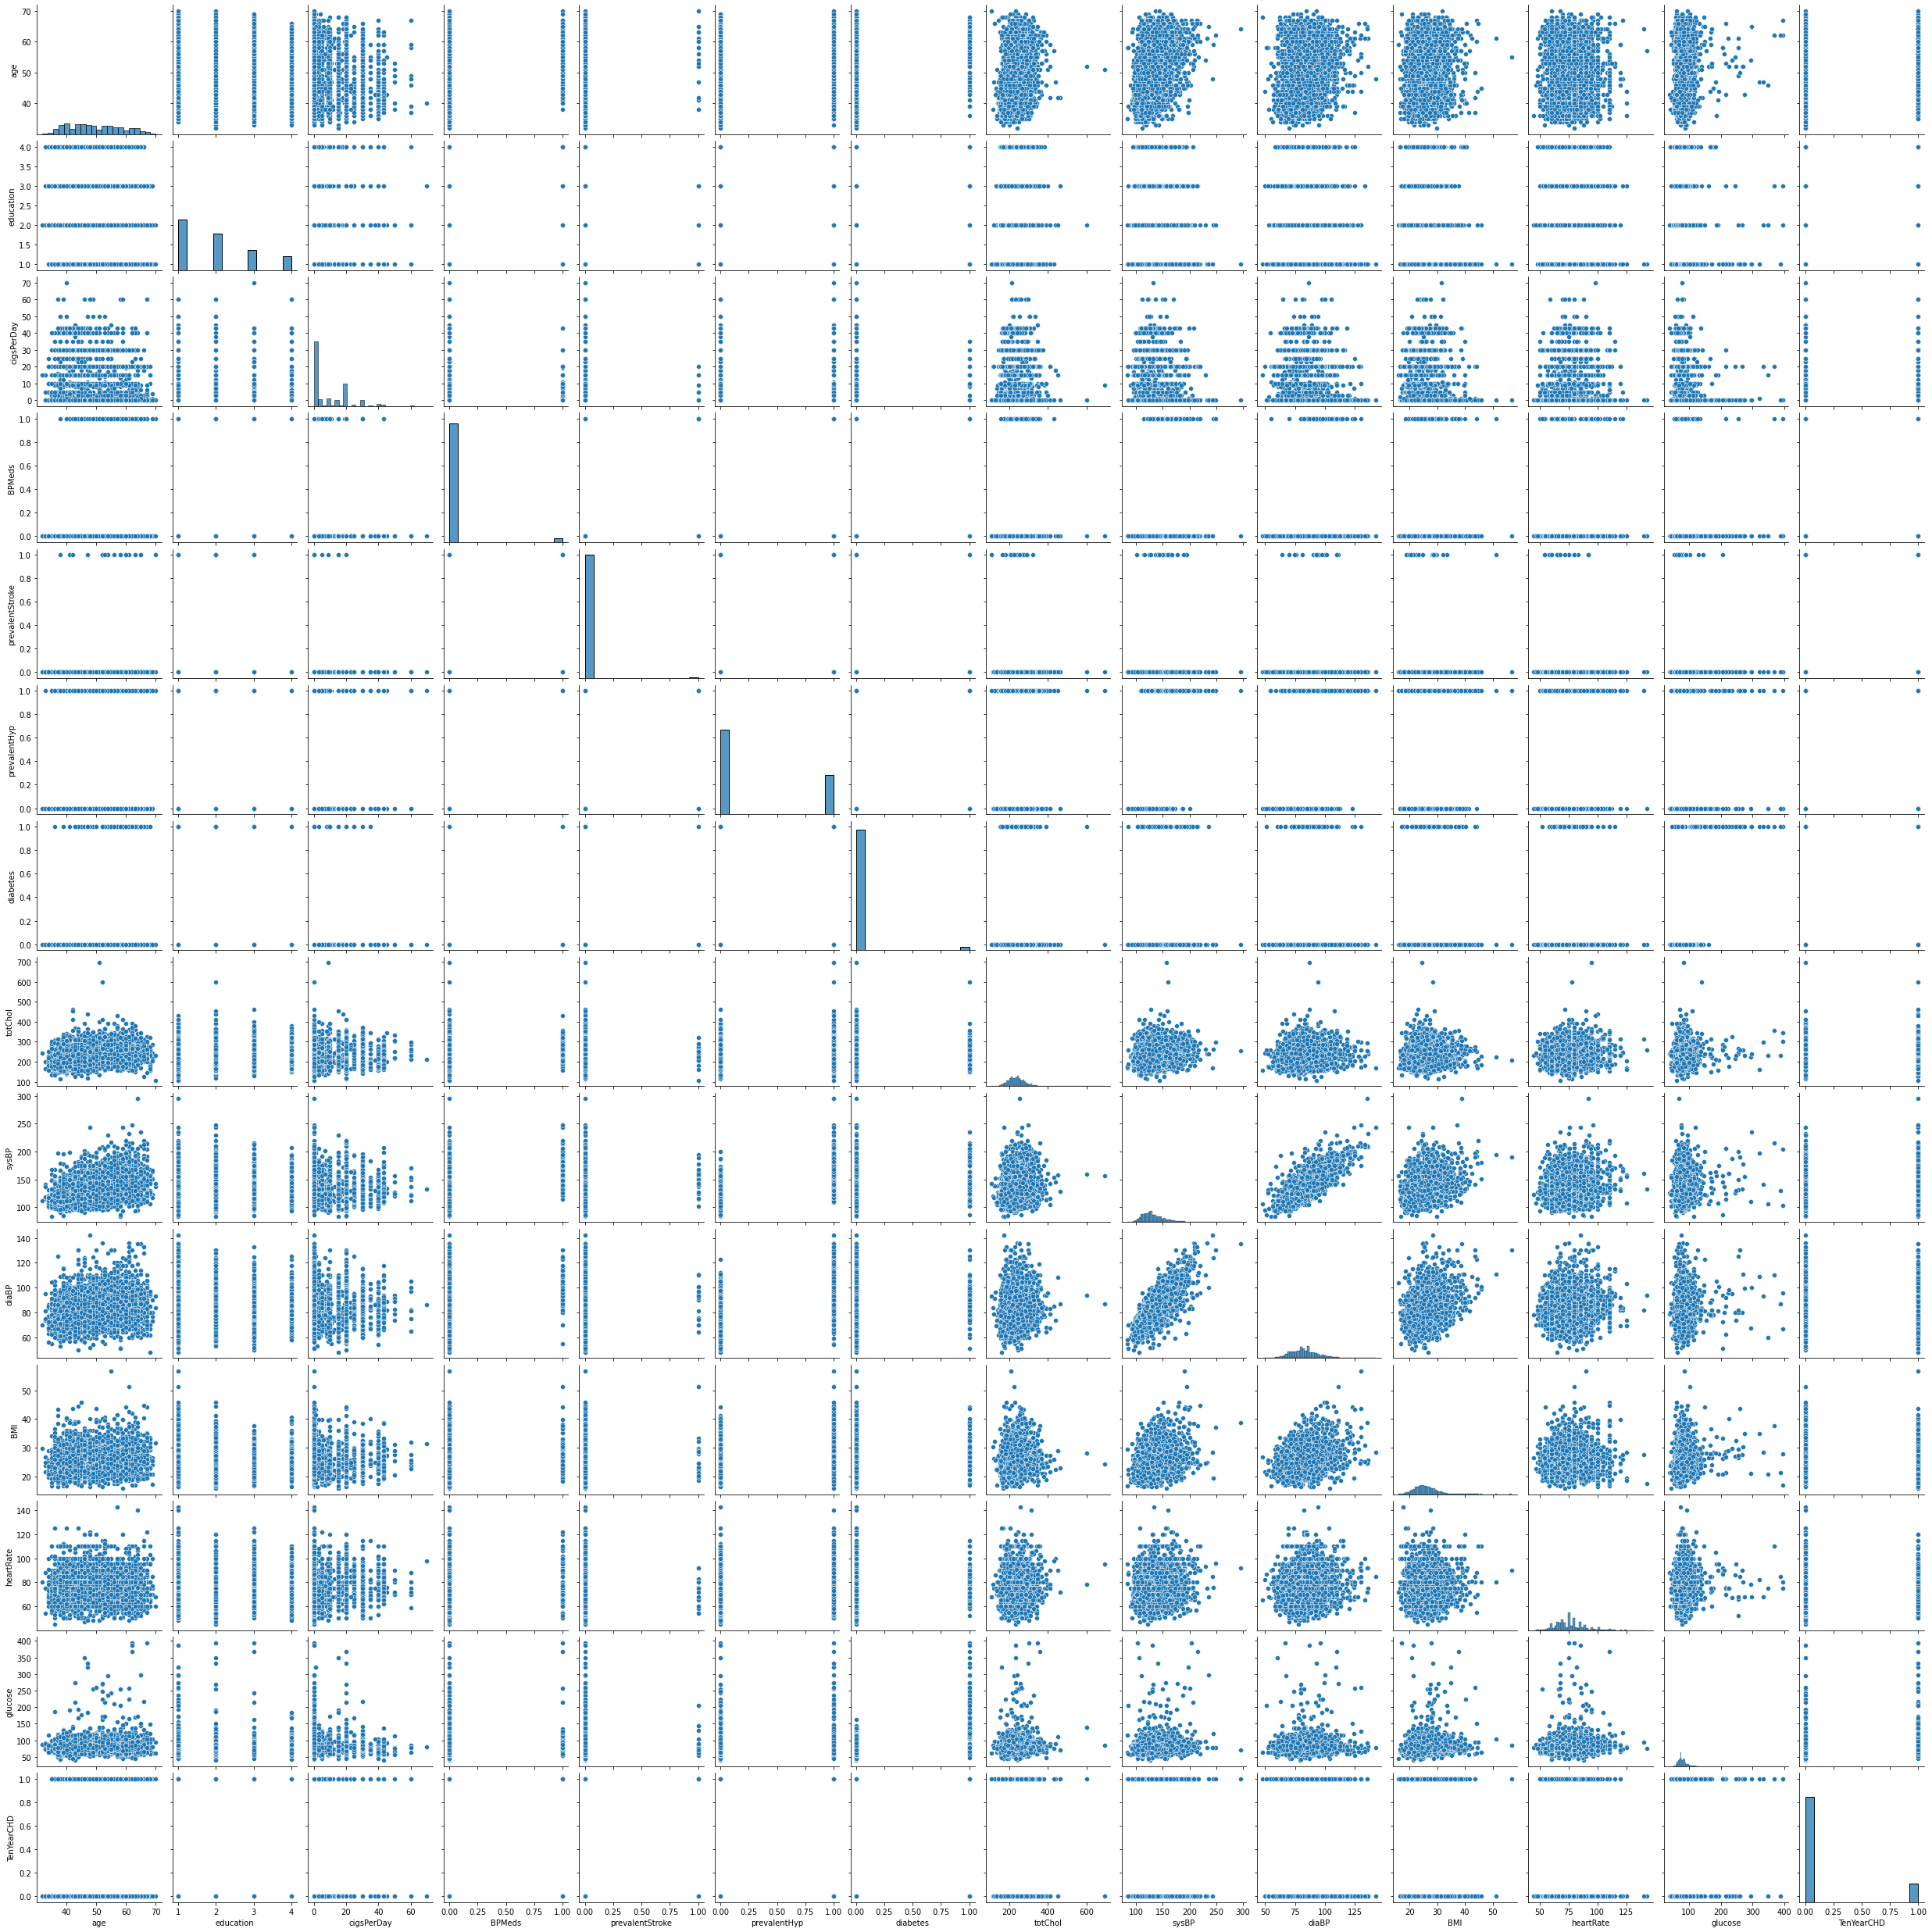

In [19]:
sns.pairplot(df)
plt.show()

In [18]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [20]:
round(df.value_counts("TenYearCHD")/df.shape[0],2)

TenYearCHD
0    0.85
1    0.15
dtype: float64

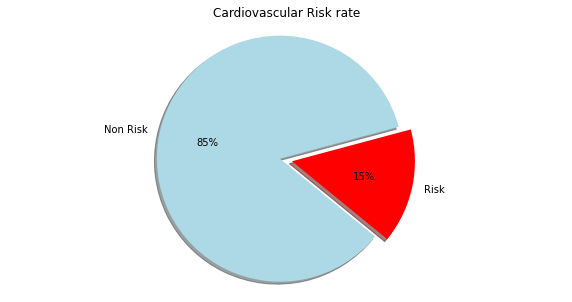

In [21]:
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

In [22]:
# Renaming the dependent variable 'TenYearCHD' to 'RISK'

df.rename(columns={"TenYearCHD":"RISK"},inplace=True)


## ***Separating the data into feature and target data***

In [24]:
X= df.drop('RISK',axis=1)  # Independent variable (feature)
Y= df["RISK"]              # Dependent variable   (Target variable)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=1)

In [29]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RISK
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [36]:

def preprocess_inputs(df):
  df=df.copy()
  #binary encoding
  df['sex']= df['sex'].apply(lambda x: 1 if x=='M' else 0)
  df['is_smoking']= df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

  
  return df

In [34]:
train_data= preprocess_inputs(X_train)
test_data= preprocess_inputs(X_test)

In [35]:
train_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
542,49,2.0,0,1,20.0,0.0,0,0,0,229.0,118.5,76.5,21.42,76.0,NaN
2726,51,3.0,1,0,0.0,0.0,0,0,0,215.0,147.0,96.0,28.59,65.0,100.0
3067,57,1.0,0,1,1.0,0.0,0,1,0,254.0,146.5,81.0,41.61,72.0,85.0
204,59,4.0,0,0,0.0,1.0,0,1,0,282.0,135.0,87.0,28.96,72.0,NaN
329,52,1.0,0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN


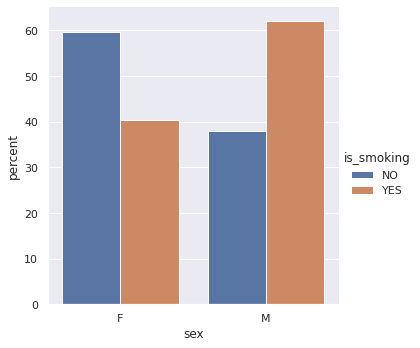

In [44]:
import seaborn as sns
sns.set(color_codes=True)

x,y = 'sex', 'is_smoking'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
